In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [2]:
x = sp.Symbol('x', real = True)
w = sp.Symbol('w', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
m = sp.Symbol('m', real = True, positive = True)
A = sp.Symbol('A', real = True)
p = sp.Function('psi')

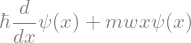

In [3]:
h * p(x).diff(x)+ m * w * x * p(x)

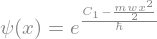

In [4]:
res = sp.dsolve(h * p(x).diff(x)+ m * w * x * p(x), p(x))
res

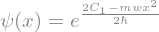

In [5]:
res.simplify()

In [6]:
res = A * sp.exp(- m * w * x**2 / (2 * h))
res

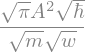

In [7]:
sp.integrate(res**2, (x, -sp.oo, sp.oo))

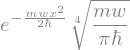

In [14]:
psi0 = sp.UnevaluatedExpr(m * w / (sp.pi * h))**sp.Rational(1, 4) * sp.exp(- m * w * x**2 / (2 * h))
psi0

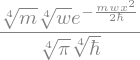

In [18]:
psi0.doit()

In [9]:
def aplus(psi):
    return (- h * psi.diff(x) + m * w * x * psi) / sp.sqrt(2 * m * h * w)

In [10]:
def aminus(psi):
    return (+ h * psi.diff(x) + m * w * x * psi) / sp.sqrt(2 * m * h * w)

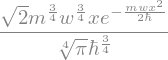

In [13]:
aplus(psi0.doit())

In [15]:
aminus(psi0.doit())

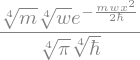

In [17]:
aminus(aplus(psi0.doit()).doit()).simplify()

In [19]:
def psip1(psi, n):
    return aplus(psi) / sp.sqrt(n + 1)

In [20]:
def psim1(psi, n):
    return aminus(psi) / sp.sqrt(n)

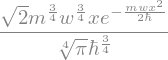

In [21]:
psi1 = psip1(psi0.doit(), 0)
psi1

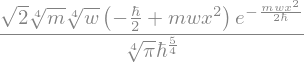

In [23]:
psi2 = psip1(psi1, 1)
psi2.simplify()

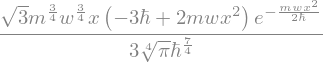

In [24]:
psi3 = psip1(psi2, 2)
psi3.simplify()

In [25]:
sp.integrate(psi3**2, (x, -sp.oo, sp.oo))

In [26]:
xs = np.linspace(-5, 5, 1000)

In [27]:
f = lambdify(x, psi0.subs({h: 1, m: 1, w: 1}))

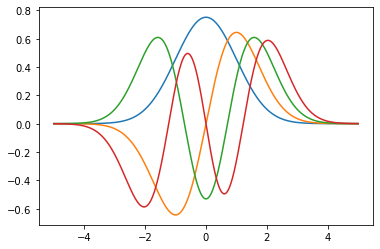

In [33]:
plt.plot(xs, lambdify(x, psi0.subs({h: 1, m: 1, w: 1}))(xs))
plt.plot(xs, lambdify(x, psi1.subs({h: 1, m: 1, w: 1}))(xs))
plt.plot(xs, lambdify(x, psi2.subs({h: 1, m: 1, w: 1}))(xs))
plt.plot(xs, lambdify(x, psi3.subs({h: 1, m: 1, w: 1}))(xs))

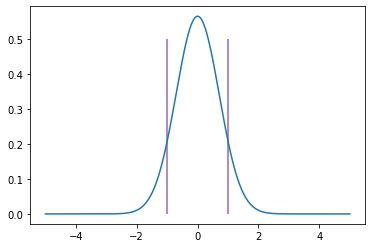

In [41]:
plt.plot(xs, lambdify(x, psi0.subs({h: 1, m: 1, w: 1})**2)(xs))
plt.vlines([-np.sqrt(1), np.sqrt(1)], 0, 0.5, 'C4')
#plt.plot(xs, lambdify(x, psi1.subs({h: 1, m: 1, w: 1})**2)(xs))
#plt.plot(xs, lambdify(x, psi2.subs({h: 1, m: 1, w: 1})**2)(xs))
#plt.plot(xs, lambdify(x, psi3.subs({h: 1, m: 1, w: 1})**2)(xs))